In [68]:
import pandas as pd

In [69]:
df = pd.read_csv("./dataset/Data PMB - Sheet2.csv")
print(df.shape)
df.isna().sum()

(274, 19)


Ranking Nasional          0
Unnamed: 1              112
Ranking Provinsi          0
NPSN                      0
Sekolah                   0
Provinsi                  0
Kota/Kab.                 0
Jenis Sekolah             0
Nilai Total               0
TPS                       0
TKA Saintek               0
TKA Soshum                0
Akun                      5
Req Token                13
Token                    91
Lulus                    27
UP3                     171
Registrasi Mahasiswa    274
Jarak                     0
dtype: int64

In [70]:
df.fillna(0,inplace=True)

In [71]:
df.columns

Index(['Ranking Nasional', 'Unnamed: 1', 'Ranking Provinsi', 'NPSN', 'Sekolah',
       'Provinsi', 'Kota/Kab.', 'Jenis Sekolah', 'Nilai Total', 'TPS',
       'TKA Saintek', 'TKA Soshum', 'Akun', 'Req Token', 'Token', 'Lulus',
       'UP3', 'Registrasi Mahasiswa', 'Jarak'],
      dtype='object')

In [72]:
df.head()

,Ranking Nasional,Unnamed: 1,Ranking Provinsi,NPSN,Sekolah,Provinsi,Kota/Kab.,Jenis Sekolah,Nilai Total,TPS,TKA Saintek,TKA Soshum,Akun,Req Token,Token,Lulus,UP3,Registrasi Mahasiswa,Jarak
0,164,66.0,23,20525854,SMAN 1 GENTENG,Jawa Timur,Kab. Banyuwangi,SMA,562016,580480,569800,573267,12.0,9.0,1.0,2.0,1.0,0.0,290
1,312,83.0,52,20525856,SMAN 1 GLAGAH,Jawa Timur,Kab. Banyuwangi,SMA,545879,565718,534925,549495,6.0,4.0,3.0,3.0,0.0,0.0,290
2,667,76.0,110,20525855,SMAN 1 GIRI,Jawa Timur,Kab. Banyuwangi,SMA,523274,532869,50813,531870,10.0,5.0,1.0,3.0,0.0,0.0,290
3,852,116.0,138,20525600,SMA NEGERI 2 TARUNA BHAYANGKARA JAWA TIMUR,Jawa Timur,Kab. Banyuwangi,SMA,516414,524332,524332,523727,0.0,0.0,0.0,0.0,0.0,0.0,290
4,318,87.0,53,20514344,SMAN 1 TALUN,Jawa Timur,Kab. Blitar,SMA,545372,564802,532776,559240,11.0,7.0,0.0,0.0,0.0,0.0,164


In [73]:
df.drop(columns=['Unnamed: 1', 'Provinsi', 'Kota/Kab.', 'Jenis Sekolah','NPSN','Ranking Nasional'], inplace=True)

In [74]:
df.head()

,Ranking Provinsi,Sekolah,Nilai Total,TPS,TKA Saintek,TKA Soshum,Akun,Req Token,Token,Lulus,UP3,Registrasi Mahasiswa,Jarak
0,23,SMAN 1 GENTENG,562016,580480,569800,573267,12.0,9.0,1.0,2.0,1.0,0.0,290
1,52,SMAN 1 GLAGAH,545879,565718,534925,549495,6.0,4.0,3.0,3.0,0.0,0.0,290
2,110,SMAN 1 GIRI,523274,532869,50813,531870,10.0,5.0,1.0,3.0,0.0,0.0,290
3,138,SMA NEGERI 2 TARUNA BHAYANGKARA JAWA TIMUR,516414,524332,524332,523727,0.0,0.0,0.0,0.0,0.0,0.0,290
4,53,SMAN 1 TALUN,545372,564802,532776,559240,11.0,7.0,0.0,0.0,0.0,0.0,164


In [75]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

c:\Users\Asus\anaconda3\envs\py3.11-TF2.0\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Asus\anaconda3\envs\py3.11-TF2.0\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Asus\anaconda3\envs\py3.11-TF2.0\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Asus\anaconda3\envs\py3.11-TF2.0\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default valu

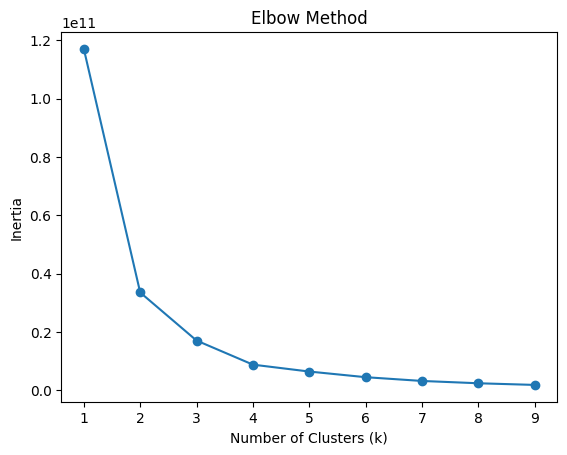

In [79]:
X = df[['Nilai Total','UP3']]

# Inisialisasi daftar untuk menyimpan nilai inertia
inertia_values = []

# Menentukan jumlah klaster yang akan diuji
k_values = range(1, 10)

# Melakukan iterasi untuk setiap nilai k
for k in k_values:
    # Inisialisasi model K-Means
    kmeans = KMeans(n_clusters=k)
    
    # Melatih model dengan data
    kmeans.fit(X)
    
    # Menyimpan nilai inertia (within-cluster sum of squares)
    inertia_values.append(kmeans.inertia_)

# Plot inertia values untuk setiap nilai k
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()


c:\Users\Asus\anaconda3\envs\py3.11-TF2.0\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


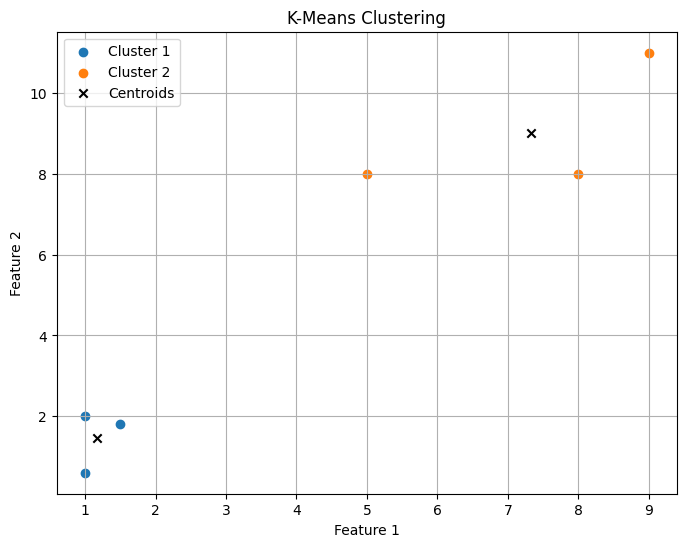

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Data contoh dengan beberapa fitur
data = {'Feature 1': [1, 5, 1.5, 8, 1, 9],
        'Feature 2': [2, 8, 1.8, 8, 0.6, 11],
        'Feature 3': [3, 7, 1, 6, 2, 12]}
df = pd.DataFrame(data)

# Tentukan jumlah kluster yang diinginkan
n_clusters = 2

# Inisialisasi model K-Means
kmeans = KMeans(n_clusters=n_clusters)

# Melatih model K-Means dengan data
kmeans.fit(df)

# Mendapatkan label kluster untuk setiap data poin
labels = kmeans.labels_

# Mendapatkan posisi pusat dari setiap kluster
centers = kmeans.cluster_centers_

# Scatter plot untuk visualisasi klasterisasi
plt.figure(figsize=(8, 6))

# Plot data poin untuk setiap kluster
for i in range(n_clusters):
    cluster_data = df[labels == i]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {i+1}')

# Plot posisi pusat kluster
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='black', label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()
